In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import random

sns.set_context('notebook')
sns.set_style('whitegrid')

[Reddit Post](https://www.reddit.com/r/Infographics/comments/vunkv3/gun_deaths_per_5m_people_compared_to_ownership/)
* Original post that inspired this project. See comments for discussion on what's lacking from the data regarding sucide. 

[Death Data](https://vizhub.healthdata.org/gbd-results/#state=eyJpZCI6IjZiMWE0YzBjLTM0NDYtNDk0Ny1hNjcyLTg4YjM4OGUwZjg3NiIsIm1ldGEiOnsiaW50ZXJhY3Rpb25UeXBlIjoicmVkaXJlY3QifX0%3d&client_info=eyJ1aWQiOiJiYTRjMWQ4Mi0zMGE1LTQxNzItOTM3ZC0xYjI3NDYzODdhOWMtYjJjXzFhX3NpZ251cF9zaWduaW4iLCJ1dGlkIjoiYTA3NjU1ZjYtZTQ4Mi00MmYzLThiMzAtNmI3ZDAwOWY4MTNkIn0&code=eyJraWQiOiJiS2szUnJCSkxKczBiT2VoeTdHT1VZaGlBYWhVMHlXb01pNU1aUkRmLUU4IiwidmVyIjoiMS4wIiwiemlwIjoiRGVmbGF0ZSIsInNlciI6IjEuMCJ9.FipGmT_mq8vKu19kkoCb0FUhV5vXfjfkyhhPkgu9uhP7-5uqhAhGA1hZ5TQ6uex5rg-VMYse_mTqksHijQezZU7YErZIpqMxAESzzj3oM4NQSGra8N_XnsjT5nUCAu35G_RSX9UnJUw-tv6fM-VDkKvJsta6hqIWTNWeLurCiTiz1kntndP3fplJxBWcZN1y3iED6ifEfdvcrUl-Ly4yU5oDFOu5_UJkvwduT_h2zIHxTV_cfUj4PSS1PVshhpUilwTT3tMK2JN4-OcpoRvqdyEaFRx1UKW5NfMdES_aHvix1h8pA7ovpLaFj8yhJfoz4fGNHY7CtKUiMEwH7Hy1tQ.fHog58lBU-8B21Vt.Y5pb5G6d0Wc-H7evNL5QN5cJWJ9nmpy37lZfLlVnbiIdjBx7qJ4DW5W1RlbKeoV_NDqHmqqCIDjTXF11P_OO0CJCfaDQ42mWpu5S25R6SVFS3A1z6dh_N5XuELQdPXIKT2CuIcTWjpnyur_wZqvoLga31yfhbuuTBXgQvwv8sYJGLfiu5B45HBht1_9VdyUf_-PosrUh4TT7jYmSqPirf7YoPSqsuzj3PtbvNX3iirSeU--GoSqicpvwHUvIDhTyu3kuza5eEkkPg58H8Ujz4rmR5aOafrFrrbnU23y-tPeb13Zd4l_anSzbmvso2llg5OzIFWfSoVjw5CTHEV2zNCDD4nYAT6VSV5mVuWbK8XhieEHRTESsNcviwuTdQC4Ww5TKR3R7mcEN8SQCnoSAfdgDjGR4BZrziDZUGy4bjIvjwRyI-Lm_yG6yXiJw2KWeXFpjebnVwZ1zJJ2EE1348xJCf3Z5iLEYaqI8RNWhA92gR2rlku1an7DtB6FeTy7ZpovCMVaLPlsB4Gws4IOA9apRfgU576SizXRhwkkG1RxdfvkQalVtW9KoH9YFx7C3U3BD6gGQVIXAm5F7xXZJD9USu6wsan1orfl6zf_lwraNHKWLnSa7-1yDzY4qgQJENezmWBpg2OewpYEu4_PrCbJj36ZcSzUsQi7XfRZL2h5PrhwTVZl5yrWp28hncshIBS7w0yjbwyOuMizEWZ4MS2R7PKd6hBCuCeVghc8rjIsydsji44baFwbO3-5HgMZjInzbE1G3wFQieor3SKY576p8d9mDai843mGdp4x2JoJVCwQO2XXwcpm1yPxabYYR8-ksL3dz0doAX52JTuBnaRLyivUaZyAGwyRJboo4k3__puixicEOL0Ffnsxggq8gyyapjDI-YF5O6pYO8TncahLQuJlxoHIWB5Wgh75O9phE9G2dr1It4DUHtpHND0a_Xv054noH5O8ItHv0Jj420vv-8FQo2E1-UvaaRmFdb8KJcgRAQiJ6w-Xu0LF8mQ.c5pBWJChG5fg3S-zfIrxlQ)

Some critics said that this lumped in suicides and accidentals. The death data I'm using here depended on a collect ICD9 and ICD10 codes related to different deaths. The codes are grouped into accidental deaths, sucide, and interpersonal violence. In my analysis, I'm *only* looking at interpersonal violence. Meaning, this is only gun-death data that involved one person killing anohter as a result of some conflict. *Note*: This doesn't include acts of terrorism!

[Small Arms Survey](https://www.smallarmssurvey.org/sites/default/files/resources/SAS-BP-Civilian-Firearms-Numbers.pdf)

[IQ and Income (2002-2010)](https://www.worlddata.info/iq-by-country.php)
* The data was aggregated from multiple studies reporting on IQ and income from various countries. Later results are weighted more heavily. 

[Human Development Index (2019)](https://worldpopulationreview.com/country-rankings/developed-countries)


In [29]:
# Small Arms Survey
sas = pd.read_excel("raw_data/small_arms_survey.xlsx", header=1)
sas = sas.drop([0])
sas.rename(columns=lambda s:s.replace("*",""), inplace=True)
sas.rename(columns=lambda s:s.replace(" ","_"), inplace=True)
sas.rename(columns=lambda s:s.lower(), inplace=True)
sas.rename(columns={'countries_and_territories':'location'}, inplace=True)
sas['location'][sas['location'] == 'United States of America'] = 'United States'

# Gun Deaths Dataset

death = pd.read_csv('raw_data/firearm_deaths.csv')
death.rename(columns={'val':'n_deaths', 'upper':'n_deaths_upper', 'lower':'n_deaths_lower'}, inplace=True)
death = death[death['cause'] == 'Physical violence by firearm']
death['location'][death['location'] == 'United States of America'] = 'United States'
death.drop(columns=['sex', 'age', 'cause', 'metric', 'year', 'measure'], inplace=True)

# IQ and Income (1990 to 2010)
inq = pd.read_excel("raw_data/2010_IQ_income.xlsx")
inq = inq.drop(columns=['daily_max_temp', 'income'])
inq.rename(columns={'Country': 'location'}, inplace=True)

#Human Development Index (2019)
hdi = pd.read_csv('raw_data/hdi_data.csv')
 
# #Merge and tidy
sas = pd.merge(sas, death, on='location')
sas = pd.merge(sas, inq, on='location')
sas = pd.merge(sas, hdi, on='location')
sas.rename(columns=lambda s:s.replace("estimate_of_",""), inplace=True)
sas['location'][sas['location'] == 'United Arab Emirates'] = 'UAE'

# # New variables
sas['gun_death_per100'] = (sas['n_deaths'].astype(int) / sas['population_2017']) * 100
sas['gun_deaths_sq'] = sas['gun_death_per100'] ** (1/2)
sas['guns_owned_sq'] = sas['civilian_held_firearms_per_100_persons'] ** (1/2)

/Users/cfulsong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
sas.to_csv('outputs/cleaned_firearms_data.csv')

## Human Development Index

* High values indicate more developed nations
* Countries with > 0.8 are considered "developed"

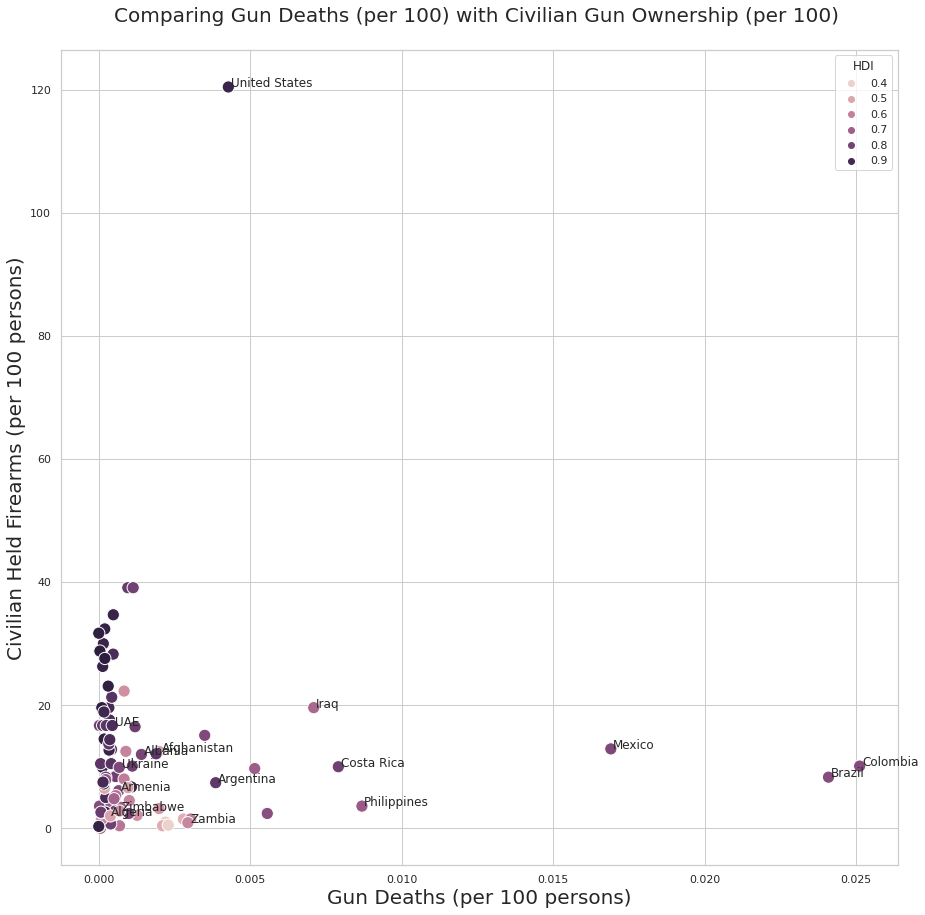

In [5]:
plt.figure(figsize=(15,15))
# data = sas[sas['hdi2019'] > 0.8].reset_index()
data = sas
labels = data.head().append(data.tail()).location
labels = labels.append(data[data['gun_death_per100'] > 0.006].location)

x = 'gun_death_per100'
y = 'civilian_held_firearms_per_100_persons'

ax = sns.scatterplot(data=data,
                     x=x,
                     y=y,
                     hue=data['hdi2019'],
                     s=150)

ax.set_title("Comparing Gun Deaths (per 100) with Civilian Gun Ownership (per 100) \n", fontsize = 20)
ax.set_xlabel("Gun Deaths (per 100 persons)", fontsize = 20)
ax.set_ylabel("Civilian Held Firearms (per 100 persons)", fontsize = 20)
ax.legend_.set_title("HDI")


inc = 0.00008
for label in labels:
    x_axis = data[data['location'] == label][x].iloc[0] + inc
    y_axis = data[data['location'] == label][y].iloc[0] + inc
    ax.annotate(label, (x_axis, y_axis))




In [34]:
import missingno as mno #import library for missing data analysis

def drawScatterPlot(targetDf, originDfToCompare = None):
  if len(targetDf.columns) != 2:
    print("there should be two variables only in targetDf")
    return
    
  plt.figure(figsize=(5,5))
  sns.scatterplot(data=targetDf, x=targetDf.columns[0], y=targetDf.columns[1])
 
  if originDfToCompare is not None:  
    if len(originDfToCompare.columns) != 2:
      print("there should be two variables only in originDfToCompare")
      return

    plt.figure(figsize=(5,5))
    sns.scatterplot(data=originDfToCompare, x=originDfToCompare.columns[0], y=originDfToCompare.columns[1])

## Missing Data

Creating two copies of the working dataset. One as the orignial, reduced down to the two target variables, and one that will have data randomly removed.

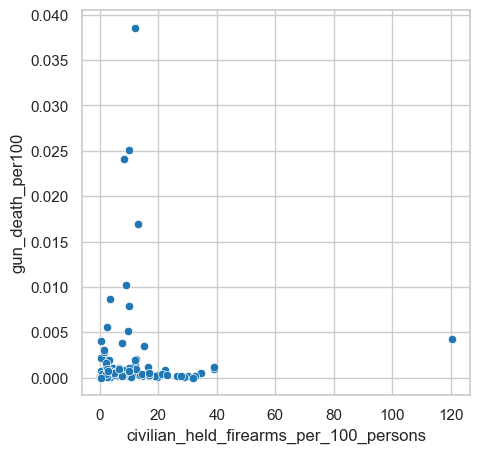

In [50]:
original_df = sas[ ['civilian_held_firearms_per_100_persons', 'gun_death_per100'] ]
new_df = sas[ ['civilian_held_firearms_per_100_persons', 'gun_death_per100'] ]
drawScatterPlot(new_df) #check the original datapoints distribution 


Next step is to randomly remove values from the new dataset. However, we want to keep the original values for comparison (`originalValues`). The next block stores the orignal values in a dictionary for reference. For each value selected and stored from the orignal data, the cooresponding value in the new dataframe is set to `np.NaN`. 

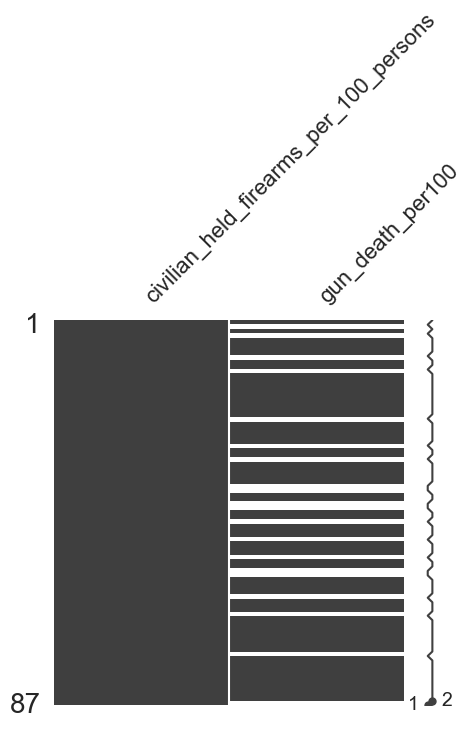

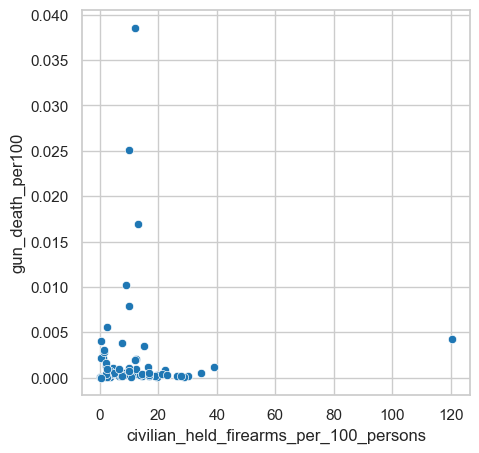

In [51]:
howManyMissingValues = 20
randomList = random.sample(range( len(new_df) ), howManyMissingValues) #Creates list of random indices
originalValues = {}  #this dictionary is to compare the original ones and the predicted ones
for x in randomList:
  originalValues.update( { original_df.at[x, 'gun_death_per100'] : original_df.at[x, 'civilian_held_firearms_per_100_persons']})    #insert original values
  new_df.at[x, 'gun_death_per100'] = np.NaN

mno.matrix(new_df, figsize = (5, 5)) #check the missing values distribution
drawScatterPlot(new_df) #check the modified one  

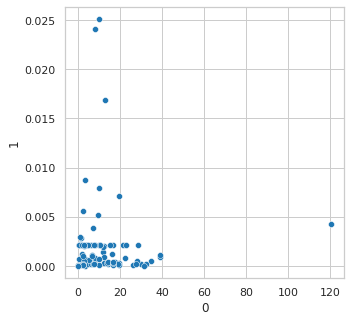

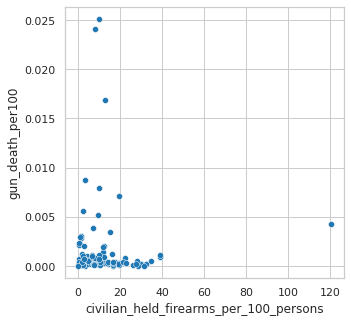

In [195]:
#let's do some traditional & simple data imputation (filling missing data with mean, median, the most frequently used one)
from sklearn.impute import SimpleImputer 

#method: mean, median, most_frequent
def simpleImputer(targetDf, originalDf, method):
  imputer = SimpleImputer(strategy = method)   #mean, median, most_frequent 
  temp = targetDf
  imputed_df = pd.DataFrame( imputer.fit_transform(temp) )
  drawScatterPlot(imputed_df, originalDf) 

simpleImputer(new_df, original_df, "mean")
# simpleImputer(new_df, original_df, "median")
# simpleImputer(new_df, original_df, "most_frequent") 

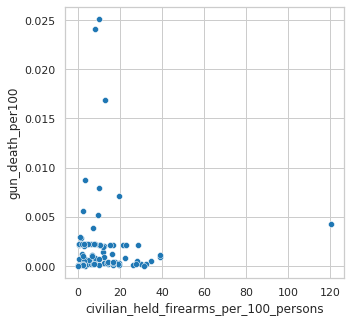

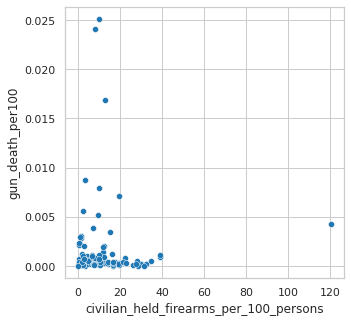

In [196]:
from scipy.optimize.minpack import shape
#imputation using linear regression model
from sklearn import linear_model
 
def simpleRegressionImputer(predictorColumn, outcomeColumn, targetDf):
  #first create a linear regression model after dropping missing data (if we have missing values in our dataframe, we might cannot draw a linear line for linear regression)
  lin_reg = linear_model.LinearRegression() 
  dropped_df = targetDf.dropna(inplace=False)  
  X = np.array(dropped_df[predictorColumn])                       #creat 1-dimension numpy array 
  Y = np.array(dropped_df[outcomeColumn])
  lin_reg_model = lin_reg.fit( X.reshape(-1, 1), Y)   #reshaping is required since regression need (X, 1) shaped dataset as a predictor 
  return lin_reg_model


#Note that we have only 20 missing values on civilian_held_firearms_per_100_persons variable
#So, we can set gun_death_per100 as a predictor (as X) to predict Y (as civilian_held_firearms_per_100_persons) 
model = simpleRegressionImputer('civilian_held_firearms_per_100_persons', 'gun_death_per100', new_df) 
regression_imputed_df = new_df  
for index, value in regression_imputed_df.iterrows():
  if value['gun_death_per100'] is np.nan:
    pred_value = model.predict([[value['civilian_held_firearms_per_100_persons']]]) 
    regression_imputed_df.at[index, 'gun_death_per100'] = pred_value[0]
 
drawScatterPlot(regression_imputed_df, original_df) 
 